<a href="https://colab.research.google.com/github/Anishabyte/CNN/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Download dataset(CIFAR 10)
# Dataloader in torch.utils
# visualizing images
# Single and multiple convolutional layer
# Lenet
# Training lenet
# Training on GPU
# simple visualiation
# Excersizes

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np

Data Loading(cifar10(10 classes) dataset having 60 k data  of 32 X32 colour images.

In [ ]:
import torchvision
import torchvision.transforms as transforms
# torchvision for downloading the data locally of cifar 10 and transform the data into tensors
# so that we can do the work
trainset=torchvision.datasets.CIFAR10(root='./data',train=True,download=True,transform=transforms.ToTensor())

100%|██████████| 170M/170M [00:04<00:00, 41.2MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


In [ ]:
classes=['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
trainloader=torch.utils.data.DataLoader(trainset,batch_size=4,shuffle=True)
# we are loading the dataset in certain batch size here 4(we will get 4 images randomly)
# and if we don not shuffle we sometimes end up in the same batches loading the same image again and again

In [ ]:
detaiter=iter(trainloader)
# dataiter is an iterator that will iterate over the batches and the next gives one instance of 4 images together
images,labels=next(detaiter)
print(images.shape)
print(images[0].shape)
print(labels[0].item())
# so the output 5 means the randomly choosen data is a dog
# 4 images 3 channels(RGB) and 32 32 size of image

torch.Size([4, 3, 32, 32])
torch.Size([3, 32, 32])
0


Visualizing data

In [ ]:
img=images[0]
# taking the 4th image from the batch of 4
print(type(img))
# so the image is a tensor of size 32 X 32 X 3

<class 'torch.Tensor'>


In [ ]:
npimg=img.numpy()
print(npimg.shape)
# we are converting the tensor into numpy in order to plot the image

(3, 32, 32)


In [ ]:
npimg=np.transpose(npimg,(1,2,0))
print(npimg.shape)
# PyTorch stores images in (C, H, W) format, but matplotlib expects (H, W, C).
# we need to permute the matrix in any dimension for a higher dimension matrix
# we need to have it in the orm of  x y z to plot  so  x=32(1) y=32(2) and z=3(0)
# so the output is  32 32 3 denoting x y z

(32, 32, 3)


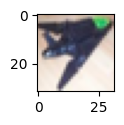

In [ ]:
plt.figure(figsize=(1,1))
plt.imshow(npimg)
# imshow for image plotting in matplotlib
plt.show()
# as the batch was 5 so it is plotting a do g
# so there is an x and y axis and there is 3 channels to show the rgb image

In [ ]:
def imshow(img):
    # img=img/2+0.5
    npimg=img.numpy()
    # plt.figure(figsize=(1,1))
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.show()
# we are previously just plotting one image so if we want to plot all images of
# the batch

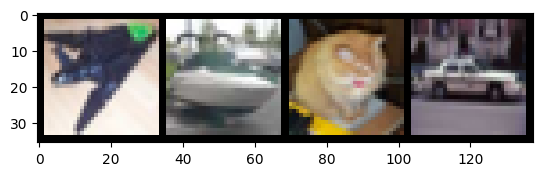

plane ship cat car


In [ ]:

imshow(torchvision.utils.make_grid(images))
print(' '.join(classes[labels[j].item()] for j in range(4)))
# for plotting all images of the batch we use utils.make_grid
# imshow is a matplot function for plotting and the black borders are done by grid

Single convolutional layer

In [ ]:
import torch.nn as nn
# from nn we are inheriting the nn.conv2d function for doing the convolutional operation
class FirstCNN(nn.Module):
    def __init__(self):
        super(FirstCNN, self).__init__()
        # it is a 2d convolution though the tensor is 4d having 4 batches 3 chanels and image size 32 32 but the kernel moves in 2d
        # nn.Conv2d(in_channels, out_channels, kernel_size, ...)
        # stride ensure that the filter moves here 2 steps at a time
        self.conv1=nn.Conv2d(3,16,3,padding=(1,1),stride=(2,2))
        # 1st parameter is the no of channels 3 and 16 channels as output is what we want different kernel and a kernel(filter) of size 3
        #padding=(1,1),stride=(2,2)
    def forward(self,x):
          # we will do the forward pass and return the output after 1st convolutional layer
          x=self.conv1(x)
          return x


In [ ]:
net=FirstCNN()

In [ ]:
out=net(images)
out.shape
# as we are not applying any padding in our conv layer we are ending up losing
# some layer leading to 32X 32 to shrink down to 30 X 30

torch.Size([4, 16, 16, 16])

In [ ]:
for param in net.parameters():
    print(param.shape)
# so there are several parameters created on doing nn.convo2d
# 1.16 kernel each of size (depth) 3 and a kernel of size 3 writen an 3 3

torch.Size([16, 3, 3, 3])
torch.Size([16])


In [ ]:
out1=out[0,0,:,:].detach().numpy()
# converting it to numpy to plot it
print(out1.shape)

(16, 16)


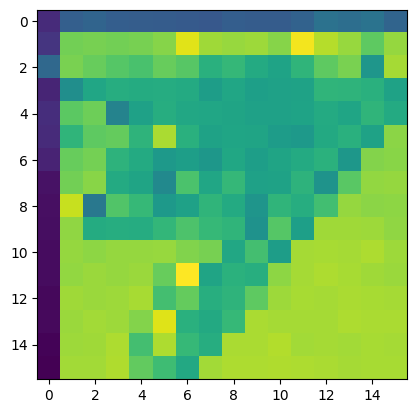

In [ ]:
plt.imshow(out[0,0,:,:].detach().numpy())
plt.show()

Deep Convolutional Network

In [ ]:
import torch.nn as nn
class FirstCNN_v2(nn.Module):
  def __init__(self):
    super(FirstCNN_v2,self).__init__()
    self.model=nn.Sequential(
        # 3 input channel 8 output channel and 3 size kernel
        # (N,3,32,32) ->(N,8,30,30) N is the batch size
        nn.Conv2d(3,8,3),
        # 8 input channel frim previous layer output and we need a 16 layer output and 3 kernel size
        # (N,8,30,30) ->(N,16,28,28) (coz we have no padding we will lose the layers)
        nn.Conv2d(8,16,3),
    )
  def forward(self,x):
     x=self.model(x)
     return x

In [ ]:
net=FirstCNN_v2()
out=net(images)
out.shape
# so the req output comes as 4,16,28,28

torch.Size([4, 16, 28, 28])

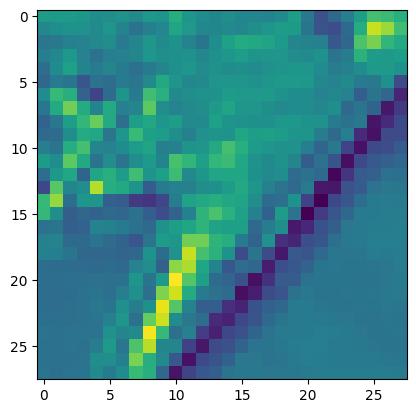

In [ ]:
plt.imshow(out[0,0,:,:].detach().numpy())
# 0th image of 0th channel
plt.show()

In [ ]:
class FirstCNN_v3(nn.Module):
  def __init__(self):
    super(FirstCNN_v3,self).__init__()
    self.model=nn.Sequential(
        nn.Conv2d(3,6,5),
        # (N,3,32,32)->(N,6,28,28)
        nn.AvgPool2d(2,stride=2),
        # 2 corresponds to 2,2 matrix for averaging the data
        # (N,6,28,28)->(N,6,14,14)
        nn.Conv2d(6,16,5),
        # (N,6,14,14) -> (N,16,10,10)
        nn.AvgPool2d(2,stride=2)
        # (N,16,10,10) ->(N,16,5,5)
    )
  def forward(self,x):
      x=self.model(x)
      return x
# mixing conviolutional layer with Average Pooling layerstride 2 means we
# are moving 2 steps to the right and 2 step to the bottom

In [ ]:
net=FirstCNN_v3()
out=net(images)
out.shape

torch.Size([4, 16, 5, 5])

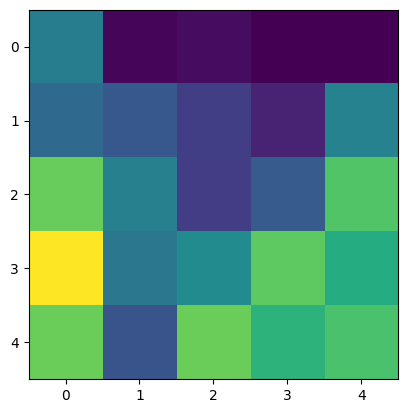

In [ ]:
plt.imshow(out[0,0,:,:].detach().numpy())

***Lenet Network***

having image convolution layer1 pooling layer1 convolutiona layer2 pooling layer 2 and some fully connected network and so on

In [ ]:
class LeNet(nn.Module):
  def __init__(self):
    super(LeNet,self).__init__()
    # these are the different cnn layer
    self.cnn_model=nn.Sequential(
        # (N,3,32,32)->(N,6,28,28)
        nn.Conv2d(3,6,5),
        nn.Tanh(),
        # (N,6,28,28)->(N,6,14,14)
        nn.AvgPool2d(2,stride=2),
        # (N,6,10,10) ->(N,16,10,10)
        nn.Conv2d(6,16,5),
        nn.Tanh(),
        # (N,16,10,10) ->(N,16,5,5)
        nn.AvgPool2d(2,stride=2)
    )
    # apply fully connected layer to flaten the output from multiple layers
    self.fc_model=nn.Sequential(
        # 16 X 16 x5 =400
        # (N,400) ->(N,120)
        nn.Linear(400,120),
        nn.Tanh(),
        # (N,120) ->(N,84)
        nn.Linear(120,84),
        nn.Tanh(),
        # (N,84) -> (N,10)
        nn.Linear(84,10)
    )
  def forward(self,x):
    print(x.shape)
    # first applying cnn function using various layers
    x=self.cnn_model(x)
    print(x.shape)
    # we are trying to collapse the (N,16,10,10) into a single index as (N,400) for flattening and using the fully connected layer
    # -1 means of 1 size index
    x=x.view(x.size(0),-1)
    print(x.shape)
    x=self.fc_model(x)
    print(x.shape)
    return x

In [ ]:
net=LeNet()
out=net(images)


torch.Size([4, 3, 32, 32])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 10])


In [ ]:
print(out)
# 4 rows for images in the batches
# the one that is largest is the one the network is predicting for that particualr image
# like 0.0905 is predicting horse
# probablities for all the 10 classes here the result is +ve and -ve is coz we are not applying softmax

tensor([[-0.0436,  0.0630,  0.0174, -0.1552,  0.0209, -0.1144,  0.0639, -0.0280,
         -0.0426, -0.0325],
        [-0.0454,  0.0692,  0.0025, -0.1353, -0.0009, -0.1227,  0.0667, -0.0460,
         -0.0525, -0.0426],
        [-0.0497,  0.0680,  0.0079, -0.1563,  0.0035, -0.1214,  0.0560, -0.0414,
         -0.0638, -0.0433],
        [-0.0481,  0.0695,  0.0003, -0.1439,  0.0095, -0.1185,  0.0502, -0.0587,
         -0.0723, -0.0363]], grad_fn=<AddmmBackward0>)


In [ ]:
max_values,pred_class=torch.max(out.data,1)
print(pred_class)
# this is showing max value from each row here we are getting in 4 the max value

tensor([6, 1, 1, 1])


Training LeNEt

In [ ]:
batch_size=128
# taking batch size as 128
trainset=torchvision.datasets.CIFAR10(root='./data',train=True,download=True,transform=transforms.ToTensor())
trainloader=torch.utils.data.DataLoader(trainset,batch_size=batch_size,shuffle=True)
testset=torchvision.datasets.CIFAR10(root='./data',train=False,download=True,transform=transforms.ToTensor())
testloader=torch.utils.data.DataLoader(trainset,batch_size=batch_size,shuffle=True)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
def evaluation(dataloader):
  # for computing the accuracy
  total,correct=0,0
  for data in dataloader:
    inputs,labels=data
    outputs=net(inputs)
    _,pred=torch.max(outputs.data,1)
    total+=labels.size(0)
    correct+=(pred==labels).sum().item()
    # returning percentage of accurate prediction
  return 100*correct/total

In [ ]:
net=LeNet()

In [ ]:
import torch.optim as optim
loss_fn=nn.CrossEntropyLoss()
# CE takes a softmax  and we are taking Adam as optimizer
opt=optim.Adam(net.parameters())

In [ ]:
# %%time
# loss_arr=[]
# loss_epoch_arr=[]
# max_epochs=16
# for epoch in range(max_epochs):
#   for i,data in enumerate(trainloader,0):
#     inputs,labels=data
#     opt.zero_grad()
#     outputs=net(inputs)
#     loss=loss_fn(outputs,labels)
#     loss.backward()
#     opt.step()
#     loss_arr.append(loss.item())
#   loss_epoch_arr.append(loss.item())
#   print('Epoch %d%d,Test acc:%0.2f'%(epoch,max_epochs-1,evaluation(testloader)))
# plt.plot(loss_epoch_arr)
# plt.show()
# # so at the end  we see a hike in loss w hich means we have diverged significantly between the test and the train

Move to GPU

In [ ]:
device=torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [ ]:
def evaluation(dataloader):
  total,correct=0,0
  for data in dataloader:
    inputs,labels=data
    inputs,labels=inputs.to(device  ),labels.to(device)
    outputs=net(inputs)
    _,pred=torch.max(outputs.data,1)
    total+=labels.size(0)
    correct+=(pred==labels).sum().item()
  return 100* correct/total

In [ ]:
net=LeNet().to(device)
Loss_fn=nn.CrossEntropyLoss()
opt=optim.Adam(net.parameters())

In [ ]:
# %%time
# max_epochs=16
# for epoch in range(max_epochs):
#   for i,data in enumerate(trainloader,0):
#     inputs,labels=data
#     inputs,labels=inputs.to(device),labels.to(device)
#     opt.zero_grad()
#     outputs=net(inputs)
#     loss=loss_fn(outputs,labels)
#     loss.backward()
#     opt.step()
#   print('Epoch: %d%d' %(epoch,max_epochs))

In [ ]:
# print('Test acc:%0.2f,Train acc %0.2f' %(evaluation(testloader),evaluation(trainloader)))

Basic Visualization

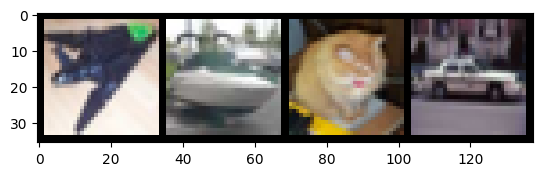

In [ ]:
# this is the intial image of 1 st batch
imshow(torchvision.utils.make_grid(images))

In [ ]:
net=net.to('cpu')

In [ ]:
out=net(images)
print(out.shape)

torch.Size([4, 3, 32, 32])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 10])
torch.Size([4, 10])


In [ ]:
# we are trying to find the visualization of first convolutional layer here
# (N,3,32,32)->(N,6,28,28)
# so i am looking for an output of 6 images of size 28 X 28 of # (N,6,28,28) 6 channels
# here 6 channels does not mean RGB rather it means different feature map learned by filter
out=net.cnn_model[0](images)
out.shape

torch.Size([4, 6, 28, 28])

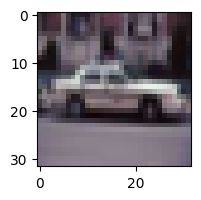

In [ ]:
# let  us take one image from the above image lets say last one
image_id=3
plt.figure(figsize=(2,2))
imshow(images[image_id,])

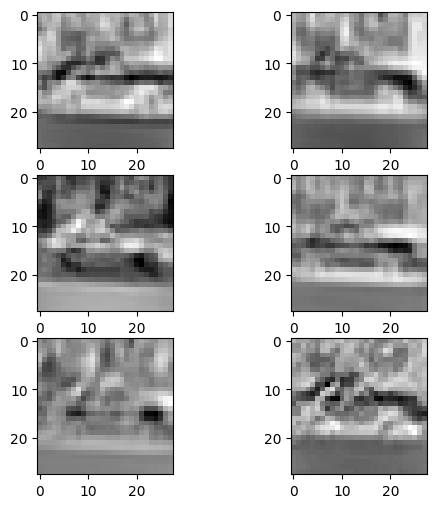

In [ ]:
plt.figure(figsize=(6,6))
plt.subplot(321)
for i in range(6):

  axl=plt.subplot(3,2,i+1)
  plt.imshow(out[image_id,i,:,:].detach().numpy(),cmap='binary')
# Yes, the 6 images shown in the plot represent the feature maps (or activations)
# generated by the filters in the first convolutional layer for a single input image.
